In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
heart = pd.read_csv('https://raw.githubusercontent.com/robotautas/kursas/master/Machine%20Learning/heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Užduotis

### Dirbsime su širdies ligų duomenimis. Turime lentelę, kurios kintamieji yra paciento duomenys ir klinikiniai rodikliai, o stulpelis target rodo, ar turi pacientas širdies ligą, ar ne. Išanalizuokite duomenis, ir sukurkite 4 modelius, kurie bandys 'diagnozuoti' širdies veiklos sutrikimus. Darbo eiga(apytikriai):

In [3]:
# patikrinkite, ar duomenyse yra trūkstamų reikšmių, jeigu yra, sutvarkykite.

heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot: xlabel='age', ylabel='trestbps'>

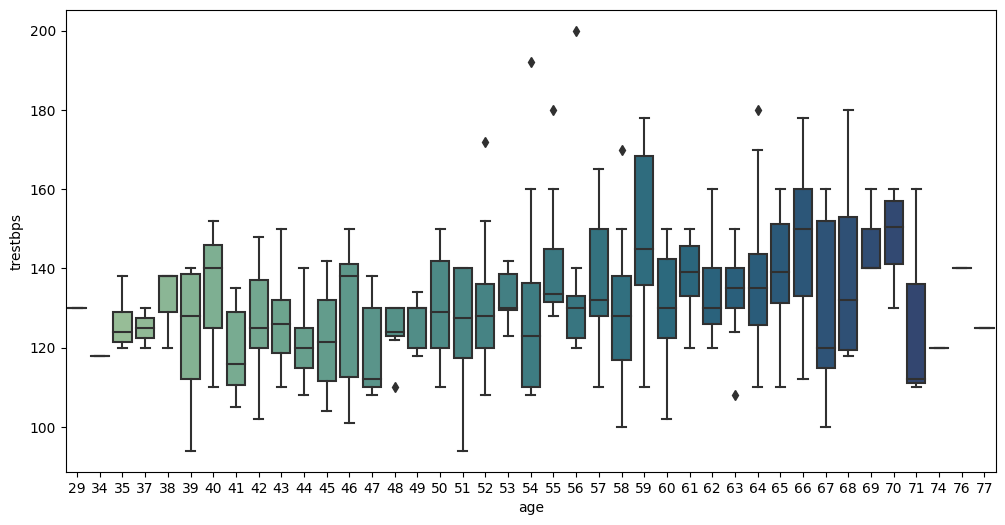

In [78]:
# išanalizuokite duomenis, atsispausdinkite keletą, jūsų nuomone, svarbių diagramų.

plt.figure(figsize=(12,6))
sns.boxplot(heart, x='age', y='trestbps', palette='crest')

<AxesSubplot: xlabel='age', ylabel='count'>

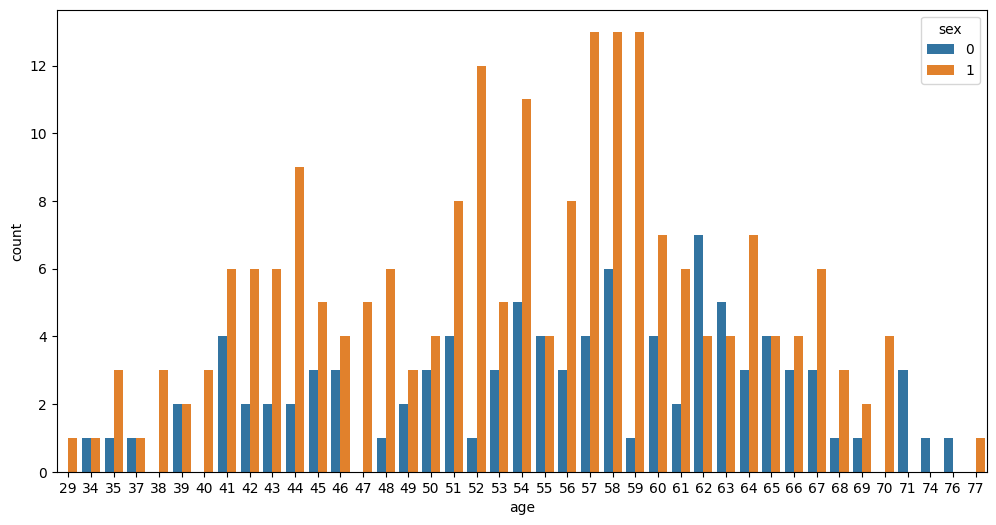

In [80]:
plt.figure(figsize=(12,6))
sns.countplot(heart, x='age', hue='sex')

<AxesSubplot: >

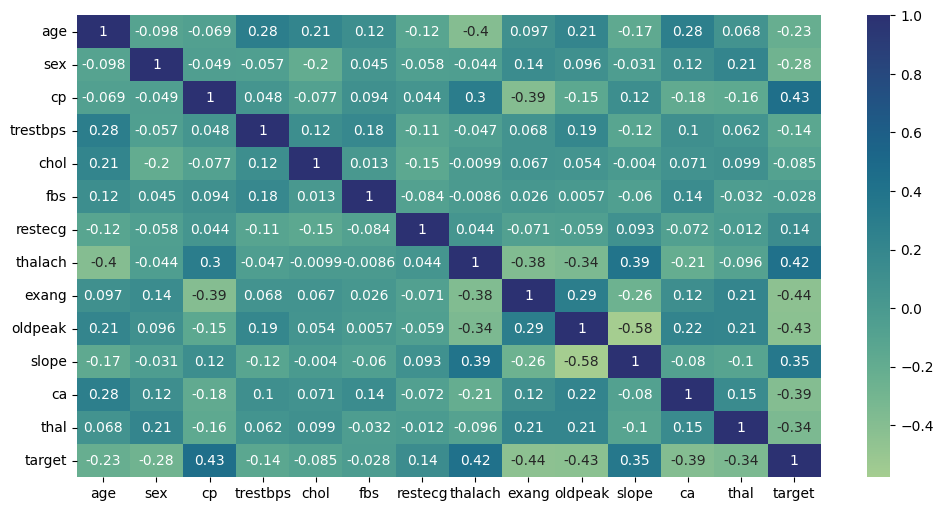

In [75]:
plt.figure(figsize=(12,6))
heart_corr = heart.corr()
sns.heatmap(heart_corr, annot=True, cmap='crest')

In [17]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [19]:
# paruoškite duomenis modelio apmokymui

features = heart[heart.columns[:-1]]
features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [20]:
target = heart['target']
target.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### apmokykite LogisticRegression, DecisionTree, RandomForests modelius, nustatykite jų efektyvumą, atsispausdinkite confusion matricas.


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [36]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.4, random_state=15)
heart_model = LogisticRegression().fit(features_train, target_train)

c:\Users\zyman\Documents\codeacademy\ptu8_data_science\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
heart_model.score(features_test, target_test)

0.8360655737704918

In [45]:
heart_prediction = pd.Series(data=heart_model.predict(features_test), name='disease_guess')
heart_combined = pd.concat([target_test.reset_index(), heart_prediction, features_test.reset_index()], axis=1)
heart_combined.drop('index', axis=1, inplace=True)

In [47]:
heart_combined.head()

,target,disease_guess,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,0,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1,0,0,67,1,0,125,254,1,1,163,0,0.2,1,2,3
2,1,1,58,1,2,140,211,1,0,165,0,0.0,2,0,2
3,1,1,41,0,1,126,306,0,1,163,0,0.0,2,0,2
4,1,1,70,1,1,156,245,0,0,143,0,0.0,2,0,2


In [41]:
heart_cm = confusion_matrix(target_test, heart_prediction)
heart_cm

array([[42, 15],
       [ 5, 60]], dtype=int64)

<AxesSubplot: >

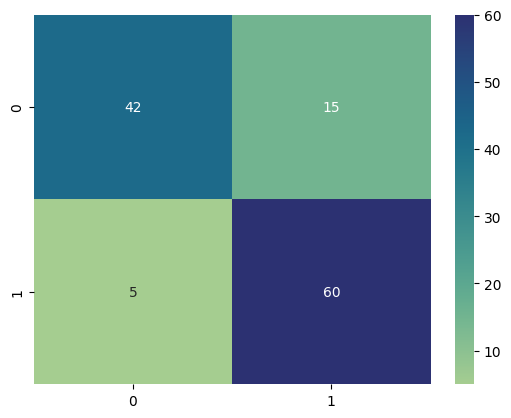

In [44]:
sns.heatmap(data=heart_cm, annot=True, cmap='crest')

In [48]:
heart_tree_model = DecisionTreeClassifier().fit(features_train, target_train)
heart_tree_model.score(features_test, target_test)

0.7868852459016393

In [49]:
heart_tree_prediction = pd.Series(data=heart_tree_model.predict(features_test), name='disease_guess')
heart_tree_combined = pd.concat([target_test.reset_index(), heart_tree_prediction, features_test.reset_index()], axis=1)
heart_tree_combined.drop('index', axis=1, inplace=True)

In [50]:
heart_tree_combined.head()

,target,disease_guess,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,0,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1,0,0,67,1,0,125,254,1,1,163,0,0.2,1,2,3
2,1,1,58,1,2,140,211,1,0,165,0,0.0,2,0,2
3,1,1,41,0,1,126,306,0,1,163,0,0.0,2,0,2
4,1,1,70,1,1,156,245,0,0,143,0,0.0,2,0,2


In [51]:
heart_tree_cm = confusion_matrix(target_test, heart_tree_prediction)
heart_tree_cm

array([[45, 12],
       [14, 51]], dtype=int64)

<AxesSubplot: >

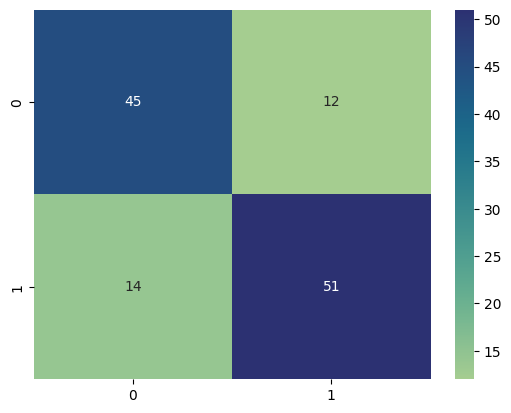

In [52]:
sns.heatmap(heart_tree_cm, annot=True, cmap='crest')

In [53]:
heart_forest_model = RandomForestClassifier().fit(features_train, target_train)
heart_forest_model.score(features_test, target_test)

0.819672131147541

In [54]:
heart_forest_prediction = pd.Series(data=heart_forest_model.predict(features_test), name='disease_guess')
heart_forest_combined = pd.concat([target_test.reset_index(), heart_forest_prediction, features_test.reset_index()], axis=1)
heart_forest_combined.drop('index', axis=1, inplace=True)

In [55]:
heart_forest_combined.head()

,target,disease_guess,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,0,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1,0,0,67,1,0,125,254,1,1,163,0,0.2,1,2,3
2,1,1,58,1,2,140,211,1,0,165,0,0.0,2,0,2
3,1,1,41,0,1,126,306,0,1,163,0,0.0,2,0,2
4,1,1,70,1,1,156,245,0,0,143,0,0.0,2,0,2


In [56]:
heart_forest_cm = confusion_matrix(target_test, heart_forest_prediction)
heart_forest_cm

array([[46, 11],
       [11, 54]], dtype=int64)

<AxesSubplot: >

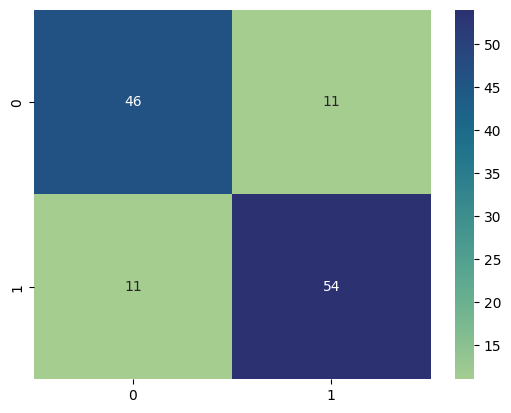

In [57]:
sns.heatmap(heart_forest_cm, annot=True, cmap='crest')

## KNearestNeighbor klasifikatorius

In [ ]:
# pasidarykite lentelės kopiją, ir jos pagrindu paruoškite duomenis KNearestNeighbor klasifikatoriui.
# apmokykite KNN, nustatykite jo efektyvumą, atsispausdinkite confusion matricą.
# kuris modelis efektyviausias? Palyginkite confusion matricas, įvertinkite, kuri pozicija jose gali būti svarbesnė už patį modelio efektyvumą (hint hint - neteisingos diagnozės..)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler().fit(features)
scale_features = scaler.transform(features)
scale_features

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [68]:
scaled_features = pd.DataFrame(data=scale_features, columns=features.columns)
scaled_features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [69]:
heart_kn_model = KNeighborsClassifier(n_neighbors=5).fit(features_train, target_train)
heart_kn_model.score(features_test, target_test)

0.6557377049180327

In [70]:
heart_kn_prediction = pd.Series(data=heart_kn_model.predict(features_test), name='disease_guess')
heart_kn_combined = pd.concat([target_test.reset_index(), heart_kn_prediction, features_test.reset_index()], axis=1)
heart_kn_combined.drop('index', axis=1, inplace=True)

In [71]:
heart_kn_combined.head()

,target,disease_guess,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,0,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1,0,0,67,1,0,125,254,1,1,163,0,0.2,1,2,3
2,1,1,58,1,2,140,211,1,0,165,0,0.0,2,0,2
3,1,1,41,0,1,126,306,0,1,163,0,0.0,2,0,2
4,1,1,70,1,1,156,245,0,0,143,0,0.0,2,0,2


In [72]:
heart_kn_cm = confusion_matrix(target_test, heart_kn_prediction)
heart_kn_cm

array([[34, 23],
       [19, 46]], dtype=int64)

<AxesSubplot: >

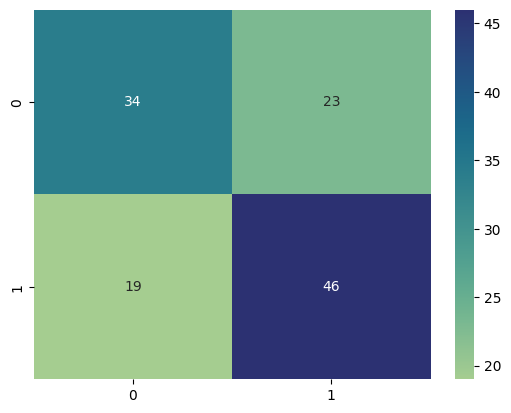

In [73]:
sns.heatmap(heart_kn_cm, annot=True, cmap='crest')